# Introduction modelling with differential equations

*Credit: [Sri Vallabha](https://github.com/hasan2014/assignment-bank) and [Frank Hoppensteadt (2006) Predator-prey model. Scholarpedia, 1(10):1563](http://www.scholarpedia.org/article/Predator-prey_model) under CC BY 3.0 with changes.*

⚠️ Remeber to watch the [3blue1brown introduction to differential equations](https://www.youtube.com/watch?v=p_di4Zn4wz4) to get an intuition on **why** we use differential equations to understand the behavior of any system.

### Analytical vs Numerical solutions

In a nutshell, solutions to differential system can be **analytical**: meaning that the solution to the differential equation is a symbolic expression or **numerical**: meaning that the solution to the differential equation is a set of values. If you have the analytical solution, you can easily obtained the numerical values but the opposite is not true.

### Open vs closed dynamical systems

In a closed dynamical system, the map —also called flow— maintains its shape in the state space for all time. On the other hand, in a open system the state-space orbits are not statics and can change over time due to the a changing flow.

## Modelling neural population



It will not come as a surprise: the basic unit of study in neuroscience is the neuron. The neuron acts as the epistemological center of gravity around which all modelling scales orbit. Neurons are specialised cells that possess an electrically excitable membrane and whose main purpose is integrating and transmitting information. They can present very different morphologies, each endowing them of distinct computational capabilities.

In their homeostatic state, neuron membranes observe a potential of $\sim -70mV$ between the interior and the exterior of the cell; in this state the cell is said to be polarised. Neurons' electric excitability arises from the presence of ion channels and ion pumps in their membranes. Ion channels are proteins that regulate the flux of ions between the inside and outside of the cell. By doing so, they enable neurons to communicate: when positively charged ions enter the cell they reduce the membrane potential, a process referred as depolarisation. If the depolarisation reaches a threshold, it will trigger a positive feedback by which more ion channels are opened and the neuron generates an electric binary signal referred to as *spike* or *action potential*. Spikes are pulse-like currents that constitute the fundamental unit of communication between neurons. When a spike reaches the postsynaptic axon terminal, it dissolves the vesicles containing neurotransmitters, releasing them into the postsynaptic cleft.

If the influx of ions into the postsynaptic neuron is positively charged, we talk about excitatory postsynaptic potential (EPSP), conversely, an influx of negatively charged ions that will further polarise the cell is referred to as an inhibitory postsynaptic potential (IPSP). Whether a presynaptic neuron generates EPSPs or IPSPs depends on its neurotransmitter profile which will determine which ion channels open up and, hence, if we have an inhibitory -i.e. polarizing- current (negatively-charged ions) or a excitatory -i.e. depolarizing- current (positively-charged ions). The neurotransmitter profile of a neuron -ie. if it releases inhibitory or excitatory neurotransmitters when activated- determine its inhibitory/excitatory nature and, along with its morphology, determines the computational properties of the neuron. In our computational models, we abstract the notion of inhibitory/excitatory synapses by negative/positive weights in the connectivity matrix of the neural population. For the spiking models these connectivity weights have Volt units [V], reflecting how much the membrane potential of the post-synaptic neuron is decreased/increased when the pre-synaptic neuron is activated; for rate-based models, the connectivity has hertz units [Hz], indicating how much the firing rate of the post-synaptic neuron  decreases/increases when the pre-synaptic neuron is activated.

Both chemical and electrical synapses are modelled in the same fashion: as a set of coupled non-linear differential equations capturing the activity of the ion channels. 

#### Point-neurons

The dynamics of the activations between two neurons require taking into account the distribution of ion-channels across the different sections of the membrane surface as well as the morphology of the membrane itself. This results in  non-linear differential models which are highly faithful but significantly complex.
An useful abstraction is to consider neurons to be point-like, that is, disregarding the spatial properties of the cell membrane similarly to the point particle approximation in physics. In point neurons, dendrites are abstracted into the connectivity the neuron. This abstraction is often used in computational neuroscience but has its limitations, for instance, neurons have been shown to perform crucial computations on their dendrites. Throughout this week and next week exercises, we will restrict our models to point-neurons.

### Integrate and fire (IF) and Leaky-integrate and fire (LIF) neurons 

Integrate-and-fire (IF) models capture the integration of postsynaptic potentials (PSPs) as a simple summation and combine them. If the cumulative sum of PSPs crosses a threshold then the neuron fires a spike. This model can be described with a differential equation used to characterise an electrical RC circuit where the cell membrane acts as a capacitor insulating the conductive intra-cellular and extra-cellular fluids; $V$ is the membrane potential, $I(t)$ is the sum of ionic input currents from presynaptic neurons and $C_{m}$ is the membrane capacitance. It is the ability of the cell membrane to accumulate charges over time that enables the neuron to integrate inputs over time and therefore it is able to perform computations.

$$
I(t) = C_{m} \frac{dV(t)}{dt}
$$

As previously discussed, in order to fire, the membrane voltage of a neuron needs to attain a threshold which, once reached, will inescapably trigger a spike. These activation dynamics can be fully described with the Hodgkin and Huxley ionic currents model. However, IF models do not intrinsically give rise to spikes, instead, a firing-threshold mechanism is added *ad hoc* to generate spikes once the defined threshold is reached and subsequently reset the membrane voltage to its resting value.
This approach has the advantage of greatly reducing the analytical and numerical complexity of differential equation models, which is especially convenient when simulating networks with hundreds of thousands of neurons.

Leaky integrate-and-fire (LIF) is a variation of Integrate-and-fire which adds a term describing the diffusion -or leak- of ions across the cell's membrane that is experimentally observed in neurons.
We start with Kirchhoff's conservation of current law for the current arriving to the cell membrane:

$$
I(t) = I_{C_{m}} + I_{leak}
$$

The cell membrane is not a perfect insulator, therefore besides the current charging the capacitor $I_{C_{m}}$, we have another *leak current* $I_{leak}$ representing the movement of charges -in the form of ions- through the cell membrane. This translates into adding the extra leaky term $I_{leak}=\frac{V(t)}{R_{m}}$ to previous equation which results in the following equation:

$$
I(t) = C_{m} \frac{dV(t)}{dt} + \frac{V(t)}{R_{m}}
$$


In the case $R_{m} \rightarrow \infty$, we retrieve the non-leaky IF model. Finally, to account for the resting potential observed on neurons in the absence of any input current, we add a resting potential term $V_{rest}$ and replace the capacitance term by $\tau_{m}/R_{m}$:

$$
I(t) = \frac{\tau_{m}}{R_{m}} \frac{dV(t)}{dt} + \frac{V(t)-V_{rest}}{R_{m}}
$$

### Numerically solve IF neuron model

As we did to solve the predator-prey model, in order to solve the differential equation we need to define a function that return the right hand side of the equation in the form $\frac{dV}{dt}=f(...)$, where $V$ is the variable we want to solve for. In our case, we are interested in finding what is the membrane potential $V$:

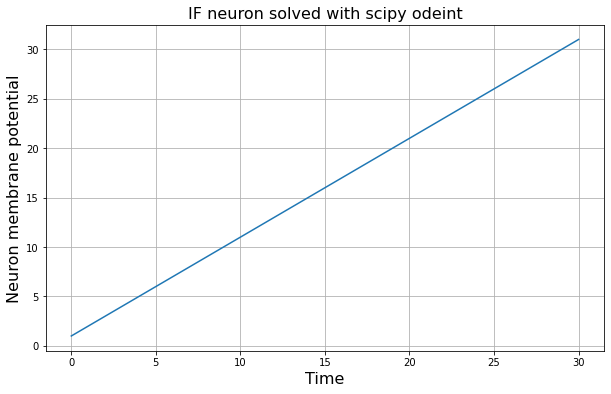

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Define the IF neuron model
def IF(v, t, input_current, membrane_capacitance):
    dvdt = input_current/membrane_capacitance
    return dvdt

# We import scipy ordinary differential equations solver
from scipy.integrate import odeint

#Defined the model parameters
membrane_capacitance = 1.
input_current = 1.

# Initial value of the neuron membrane potential v0
v0 = 1.

# Simulation timesteps
T  = 30.0                             # final time (the units will depend on what units we have chosen for the model constants)
N = 10000                             # number of time-steps for the simulation
t = np.linspace(0.,T, N)

# Call differential equation solver and stores result in variable res
solution_membrane_potential = odeint(IF, v0, t, args = (input_current, membrane_capacitance))

# Plot results
plt.figure(figsize=(10, 6))
plt.grid()
plt.title("IF neuron solved with scipy odeint", fontsize=16)
plt.plot(t, solution_membrane_potential)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Neuron membrane potential', fontsize=16)
plt.show()

We see what we get a straight line as a solution for the Integrate-Fire neuron. This makes sense since we are basically solving a single differential equation of the form $y' = k$, where $k$ is a constant. From calculus, you know that that equation has a solution of the form $ky$ which geometrically represents a straight line.

### **Exercise: Solve LIF neuron model numerically**

To make our model more interesting, we will add a leaky term. That is, a current of ions that is constantly leaving the cell.
As we did before, we first need to write of differential equation in the form of $\frac{dV}{dt}=f(...)$, we can simply re-arrange the terms of LIF equation given above

$$
I(t) = C_{m} \frac{dV(t)}{dt} + \frac{V(t)}{R_{m}}
$$

to the form:

$$
\frac{dV(t)}{dt} = \frac{I(t) - \frac{V(t)}{R_{m}} }{C_{m}}
$$

- Define a function `LIF` which returns the right hand side of the above equation:

In [2]:
import numpy as np
from matplotlib import pyplot as plt

# Define the LIF neuron model
def LIF(v, t, input_current, membrane_capacitance, membrane_resistance):
    
    ## Your code here


IndentationError: expected an indented block (3746202658.py, line 7)

- Use the code from above that we used to solve the IF model and adapt it as needed to solve this new neuron model:

In [ ]:
## Your code here

- Plot the found membrane potential and discuss its biological interpretation.

In [ ]:
## Your code here

- Explore the behavior of the neuron membrane for different values of the model. Add all the code you have used to solve the neuron LIF model: the `LIF` function definition, the calling to Scipy ODE solver and the plotting. The lines already written are responsible for making an interactive plot in the Colab. They model will be solve with the new constants every time you change their values on the slide. Notice that you can easily define ranges for the slides. This Colab feature —and its [IPython Jupiter notebooks equivalent](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html)— are a great way of quickly exploring models behaviors.

In [ ]:
#@title  { run: "auto", vertical-output: true }
membrane_capacitance = 1.0 #@param {type:"slider", min:1, max:10, step:0.5}
membrane_resistance  = 1.0 #@param {type:"slider", min:1, max:10, step:0.5}
input_current = 1.0 #@param {type:"slider", min:1, max:10, step:0.5}
initial_membrane_potential = 10 #@param {type:"slider", min:-20, max:20, step:0.5}

## Your code here

Notice that the behavior of these neuron model does not produce action potentials. To observe action potentials, LIF models are coupled with a reset mechanism that resets the membrane potential after it has reached a given value. Since this behavior does not emerge from the LIF differential equation, we would need to manually implement ourselves in the code. Next week we will see how we can use [Brian2](brian2.readthedocs.io/) to simulate populations of LIF neurons and obtain spiking behaviors. Brian will deal under the hood with solving the differential equations and we will focus on defining our model.

### Predator–prey systems

Predator-prey models are arguably the building blocks of the bio- and ecosystems as biomasses are grown out of their resource masses. Species compete, evolve and disperse simply for the purpose of seeking resources to sustain their struggle for their very existence. Depending on their specific settings of applications, they can take the forms of resource-consumer, plant-herbivore, parasite-host, tumor cells (virus)-immune system, susceptible-infectious interactions, etc. They deal with the general loss-win interactions and hence may have applications outside of ecosystems. When seemingly competitive interactions are carefully examined, they are often in fact some forms of predator-prey interaction in disguise. 

The Lotka–Volterra equations, also known as the predator–prey equations, are a pair of first-order, non-linear, autonomous* differential equations. They are frequently used to describe the dynamics of biological systems in which two species interact, one as a predator and the other as prey. You can read more about this from Wikipedia <http://en.wikipedia.org/wiki/Lotka-Volterra_equation>.

*Autonomous system or autonomous differential equation is a system of ordinary differential equations which does not explicitly depend on the independent variable, typically dynamical systems are autonomous if the state of the system does not **explicitly** depend on the time $t$.*

 Their populations change with time according to the following pair of equations:

$$
\frac{dx}{dt} = x ( \alpha - \beta y  ) 
$$

$$
\frac{dy}{dt} = -y( \gamma - \delta x )
$$

where:

- $x$ is the number of prey (say rabbits),
- $y$ is the number of predators (say foxes). 
- $dx/dt, dy/dt$ gives the rate of change of their respective populations over 
time $t$.  
  
$\alpha, \beta, \gamma, \delta $ are the parameters describing the interaction between the two species:
- $\alpha$ is the reproduction rate of species x (the prey) in the absence of interaction with species y (the predators), ie. assuming it's not predated and has infinite food supply available.
- $\beta$ is the eating rate of predator per prey (equals to the death rate of prey per predator) 
- $\gamma$ is the death rate of species y (the predators) in the absence of interaction with species x, eg. if no preys are available.
- $\delta$ is the reproduction rate of predator per prey.

The above equations can be written in a slightly different form to interpret the physical meaning of the four parameters used.

1.Equation for prey

$$
dx/dt = \alpha x - \beta x y 
$$

The prey are supposed to have unlimited supply of food and $\alpha x$ represents the rate of population growth of prey. Rate of decrease of population of prey is 
assumed to be proportional to the rate at which predator and prey meet and is given by $ \beta y x$

2.Equation for predator

$$
dy/dt = \delta x y -\gamma y
$$

For the predators, $\delta x y $ gives the rate of growth of predator population. Note that this is similar to the rate of decrease of population of prey. The second term
$\gamma y $ gives the rate of population decrease for predators due to natural death or emigration.

To solve this system of two differential equations using python, we first need to type the equations as functions as well as it parameters. The function simply needs to return the right hand side of the equations

In [ ]:
import numpy as np

# Define the function that represents the Lotka-Volterra equations
def predatorprey(xy, t, alpha, beta, delta, gamma):
    x, y = xy
    dxdt = x * (alpha - beta * y)
    dydt = - y * (gamma - delta * x)
    return np.array([dxdt, dydt])


Now we will use python library Scipy to numerically solve the system. Speciafically we will use the function [scipy.integrate.odeint()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html).

In [ ]:
# We import scipy ordinary differential equations solver
from scipy.integrate import odeint

#Defined the model parameters
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.

# Initial population size of each species
x0 = 10.
y0 = 2.
X0 = [x0, y0]

# Simulation timesteps
T  = 30.0                             # final time (the units will depend on what units we have chosen for the model constants)
N = 10000                             # number of time-steps for the simulation
t = np.linspace(0.,T, N)

# Call differential equation solver and stores result in variable res
solution = odeint(predatorprey, X0, t, args = (alpha, beta, delta, gamma))

# Unpack the solution values into two variables
x_solution, y_solution = solution.T

We will now plot the variation of population for each species with time:

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 6))
plt.grid()
plt.title("Predator-prey dynamics")
plt.plot(t, x_solution, label = 'Prey')
plt.plot(t, y_solution, label = "Predator")
plt.xlabel('Time t, [days]', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.legend()
plt.show()

A better understanding of the system behaviour can be obtained by a phase plot of the population of predators vs. the population of prey. It will tell us if the system sustains or collapses over time. For the choice of parameters $ \alpha, \beta, \gamma $ and $ \delta $ made above, we see that the maximum population of each species keeps increasing each cycle. You can read more about that in the Wikipedia link mentioned above.

### Exercises

- Play with parameters to get a sense of the bahaviour of the system and diccuss with your group the system behaviours that you observe. Try to interpret the physical meaning of the changes to the model parameters.

In [ ]:
#@title  { run: "auto", vertical-output: true }
alpha = 1.0 #@param {type:"slider", min:0.1, max:4, step:0.1}
beta  = 1.2 #@param {type:"slider", min:0.1, max:4, step:0.1}
gamma = 4.0 #@param {type:"slider", min:0.1, max:8, step:0.1}
delta = 1.0 #@param {type:"slider", min:0.1, max:4, step:0.1}

# Initial population size of each species
preys = 5 #@param {type:"slider", min:2, max:10, step:1}
predactors = 9 #@param {type:"slider", min:2, max:10, step:1}

X0 = [preys, predactors]

# Simulation timesteps
T  = 30.0                             # final time, units depend the constant's units chosen 
N = 10000                             # number of time-steps for the simulation
t = np.linspace(0.,T, N)

# Call differential equation solver and stores result in variable res
solution = odeint(predatorprey, X0, t, args = (alpha, beta, delta, gamma))

# Unpack the solution values into two variables
x_solution, y_solution = solution.T

# Plot results
plt.figure(figsize=(14, 8))
plt.grid()
plt.title("Predator-prey solved with scipy odeint", fontsize=16)
plt.plot(t, x_solution, label = 'Prey')
plt.plot(t, y_solution, label = "Predator")
plt.xlabel('Time', fontsize=16)
plt.ylabel('Populations size', fontsize=16)
plt.legend(fontsize=18)
plt.show()

- Can you find a set of parameters for which the preyed population become extinct?

#### Phase space analysis

If instead of interesting ourselves into how the population evolve overtime, we look at a population value as a function of the other, we call this **phase analysis** of the system. We can easily plot phase space by plotting the results previously obtained:

In [ ]:
plt.figure(figsize=(10, 6))
plt.grid()
plt.title("Predator-prey Phase space", fontsize=16)
plt.plot(x_solution, y_solution, label = 'Prey')
plt.xlabel('Prey', fontsize=16)
plt.ylabel('Predator', fontsize=16)
plt.legend()
plt.show()

 - We can also look at both the time evolution and phase representation at the same time. Is the shape of the phase space preserved for different model values?

In [ ]:
#@title  { run: "auto", vertical-output: true }
alpha = 1 #@param {type:"slider", min:0.1, max:4, step:0.1}
beta  = 1.2 #@param {type:"slider", min:0.1, max:4, step:0.1}
gamma = 4.0 #@param {type:"slider", min:0.1, max:8, step:0.1}
delta = 1.0 #@param {type:"slider", min:0.1, max:4, step:0.1}

# Initial population size of each species
preys = 5 #@param {type:"slider", min:5, max:20, step:1}
predactors = 10 #@param {type:"slider", min:5, max:20, step:1}

X0 = [preys, predactors]

# Simulation timesteps
T  = 30.0                             # final time, units depend the constant's units chosen 
N = 10000                             # number of time-steps for the simulation
t = np.linspace(0.,T, N)

# Call differential equation solver and stores result in variable res
solution = odeint(predatorprey, X0, t, args = (alpha, beta, delta, gamma))

# Unpack the solution values into two variables
x_solution, y_solution = solution.T

# Plot results
plt.figure(figsize=(10, 6))
plt.grid()
plt.title("Predator-prey population dynamics", fontsize=16)
plt.plot(t, x_solution, label = 'Prey')
plt.plot(t, y_solution, label = "Predator")
plt.xlabel('Time', fontsize=16)
plt.ylabel('Populations size', fontsize=16)
plt.ylim(0,20)
plt.legend(fontsize=16)

plt.figure(figsize=(10, 6))
plt.grid()
plt.title("Predator-prey Phase space", fontsize=16)
plt.plot(x_solution, y_solution)
plt.xlabel('Prey', fontsize=16)
plt.ylabel('Predator', fontsize=16)
plt.ylim(0,20)
plt.show()

Phase spaces are a powerful tool that allow us to understand the relations between the variables of a dynamical system. Be it relation between predators and preys, between two neurotransmitters or any other dynamical variables.